In [1]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.width', 1000)
# pd.options.display.float_format = '{:.3f}'.format

In [2]:
# import file data_collection
collection_data=[]
with open ('data_collection.json','r') as file:
    collection_data=json.load(file)

df_collection_data = pd.DataFrame(collection_data)

df_collection_data.head(5)

,collection,event_type,chain,tokenId,seller,buyer,quantity,price,decimals,symbol,transaction,event_timestamp
0,pudgypenguins,sale,ethereum,4244,0x29469395eaf6f95920e59f858042f0e28d98a20b,0xa548d95378ec16e000563d89684c64869f72bc0d,1.0,10670000000000000000,18.0,WETH,0x23eb4e42b3166384d7782b210a4ecef27f68d15c994e622a824ebd7749a84fe9,1719699947
1,pudgypenguins,sale,ethereum,8435,0x7182113e9902a3157bef685fbe02981ddf388ea3,0xa548d95378ec16e000563d89684c64869f72bc0d,1.0,10670000000000000000,18.0,WETH,0x33e4fac65b578d5c095923a08aded3c694dea8572f933f79f841d375748faae7,1719699575
2,pudgypenguins,sale,ethereum,4436,0x96488f9fcd0c6997c771a26d85d1f61cacfa502c,0x1ea27bce786a81022dfc156059771e8d3279a9a6,1.0,10680000000000000000,18.0,WETH,0xa4ff7fca8114415714fa4f45df49806023920529791ee6a02ebd783ddac3fa41,1719693083
3,pudgypenguins,sale,ethereum,3259,0xf13532cc8f5c700dd30f9faf8b833b38cf78c7d6,0x29469395eaf6f95920e59f858042f0e28d98a20b,1.0,10740000000000000000,18.0,WETH,0xb7a33ac75bce22fe377f2b2acd856a47d746f5d6c5c35feaebdeb29a7b46ea0e,1719676931
4,pudgypenguins,sale,ethereum,2015,0xb5e14dcf2520d154606254094f32c8d32d509115,0x29469395eaf6f95920e59f858042f0e28d98a20b,1.0,10729999945999999400,18.0,ETH,0xcb4724885fbc0850f24c9ff31c4eb258aae496556f5badb4a8e310e57e6966bf,1719676895


Mục đích kiểm tra có nên đầu tư vào collection này hay không thông qua việc
-   Xu hướng giá của collection
-   Những wallets hoạt động mạnh, chủ yếu của collection
-   Token nào hoạt động mạnh trong collection
-   Thời gian hoạt động sale xảy ra mạnh nhất

In [3]:
# xe số lượng hàng và cột
df_collection_data.shape

(876, 12)

In [4]:
# kiểm tra null
missing_value =df_collection_data.isna()
# đếm số lượng dữ liệu bị thiếu ở từng cột
for column in missing_value.columns.values.tolist():
    print(missing_value[column].value_counts())

collection
False    876
Name: count, dtype: int64
event_type
False    876
Name: count, dtype: int64
chain
False    876
Name: count, dtype: int64
tokenId
False    876
Name: count, dtype: int64
seller
False    876
Name: count, dtype: int64
buyer
False    876
Name: count, dtype: int64
quantity
False    874
True       2
Name: count, dtype: int64
price
False    876
Name: count, dtype: int64
decimals
False    875
True       1
Name: count, dtype: int64
symbol
False    876
Name: count, dtype: int64
transaction
False    876
Name: count, dtype: int64
event_timestamp
False    876
Name: count, dtype: int64


Giá trị True là null và False ngược lại
# làm sạch dữ liệu
Dữ liệu có thể có nhiều phần không liên quan và bị thiếu. Để xử lý phần này, cần phải làm sạch dữ liệu. Nó bao gồm việc xử lý dữ liệu bị thiếu, dữ liệu nhiễu, v.v. 

(a). Thiếu dữ liệu: 
Tình huống này phát sinh khi một số dữ liệu bị thiếu trong dữ liệu. Có thể xử lý theo nhiều cách khác nhau. 
1. Một số cách là: 
Bỏ qua các bộ dữ liệu: 
Cách tiếp cận này chỉ phù hợp khi tập dữ liệu chúng ta có khá lớn và nhiều giá trị bị thiếu trong một bộ dữ liệu. 
 
2. Điền các giá trị còn thiếu: 
Có nhiều cách khác nhau để thực hiện nhiệm vụ này. Bạn có thể chọn điền các giá trị còn thiếu theo cách thủ công, theo giá trị trung bình thuộc tính hoặc giá trị có khả năng xảy ra nhất. 


In [5]:
df_filtered = df_collection_data[df_collection_data['quantity'].isnull() | df_collection_data['decimals'].isnull()]
df_filtered

,collection,event_type,chain,tokenId,seller,buyer,quantity,price,decimals,symbol,transaction,event_timestamp
68,pudgypenguins,sale,ethereum,5410,0xac32967007909f5b312557e4909cb73a3dea3d8d,0x3aa31682516718eabd7ab86c8926699bc7e38969,NaN,9400000000000000000,18.0,ETH,0x2ef254f9f2aa59e028381bd00c1836594ccdae2acf8d09e6fe6a435fa638a6e6,1719589427
70,pudgypenguins,sale,ethereum,4496,0x9425d93fa42eb85fb4ec02e5e92e63c4251eb45f,0x29469395eaf6f95920e59f858042f0e28d98a20b,NaN,9392000000000000000,18.0,WETH,0xbc86a5b9e29e46f2c9de2d0dbd6e4cce47328e36df17a41eb010007ad93cc38c,1719589415
875,pudgypenguins,sale,ethereum,7968,0x29469395eaf6f95920e59f858042f0e28d98a20b,0x13747adca0ce7e7f6aa661718a07e4c74e62ed19,1.0,10620000000000000000,NaN,WETH,0x05361c05571b3138ad56fb3ccec4f03e9314c515f0d80653c043ef855bfc12e8,1717253927


In [6]:
# Mỗi token là duy nhất giá trị của token số lượng luôn là 1
df_collection_data['quantity'] =1

Đối với decimal,token_address thì chúng ta cần dựa vào symbol để điền giá trị phù hợp
decimal của token đề cập đến đơn vị nhỏ nhất mà mã thông báo tiền điện tử có thể được chia. Nó cho biết mã thông báo có thể có bao nhiêu vị trí thập phân khi được giao dịch hoặc đại diện. Số thập phân là một phần thông số kỹ thuật của mã thông báo và được xác định trong hợp đồng thông minh của nó. Sau khi được đặt, số thập phân của mã thông báo phải không thay đổi, vì việc thay đổi giá trị thập phân có thể dẫn đến sự không nhất quán và lỗi trong giao dịch mã thông báo
WETH có decimal là 18, ETH có decimal là 18,..

In [7]:
# tìm kiếm collection
unique_collection = df_collection_data['collection'].unique()
print('collection:', unique_collection)
# unique_decimal
unique_decimal = df_collection_data['decimals'].unique()
print('decimal:', unique_decimal)
# unique_symbol
unique_symbol = df_collection_data['symbol'].unique()
print('symbol:', unique_symbol)

collection: ['pudgypenguins']
decimal: [18.  8.  6. nan]
symbol: ['WETH' 'ETH' 'USDC']


In [8]:
df_collection_data['decimals'] = df_collection_data['symbol'].apply(lambda x: 18 if x in ['WETH', 'ETH'] else 6)

df_collection_data.groupby('symbol')[['decimals', 'symbol']].count()


,decimals,symbol
symbol,,
ETH,183,183
USDC,1,1
WETH,692,692


In [9]:
missing_value =df_collection_data.isna()
# đếm số lượng dữ liệu bị thiếu ở từng cột
for column in missing_value.columns.values.tolist():
    print(missing_value[column].value_counts())

collection
False    876
Name: count, dtype: int64
event_type
False    876
Name: count, dtype: int64
chain
False    876
Name: count, dtype: int64
tokenId
False    876
Name: count, dtype: int64
seller
False    876
Name: count, dtype: int64
buyer
False    876
Name: count, dtype: int64
quantity
False    876
Name: count, dtype: int64
price
False    876
Name: count, dtype: int64
decimals
False    876
Name: count, dtype: int64
symbol
False    876
Name: count, dtype: int64
transaction
False    876
Name: count, dtype: int64
event_timestamp
False    876
Name: count, dtype: int64


In [10]:
# chuyển đổi kiểu dữ liệu
df_collection_data.dtypes

collection         object
event_type         object
chain              object
tokenId            object
seller             object
buyer              object
quantity            int64
price              object
decimals            int64
symbol             object
transaction        object
event_timestamp     int64
dtype: object

In [11]:
# chuyển đổi định dạng cột time
df_collection_data['event_timestamp'] = pd.to_datetime(df_collection_data['event_timestamp'], unit='s')
# chuyển đổi kiểu dữ liệu cột payment quantity
df_collection_data['price'] = df_collection_data['price'].astype('float64')

In [12]:
df_collection_data.dtypes

collection                 object
event_type                 object
chain                      object
tokenId                    object
seller                     object
buyer                      object
quantity                    int64
price                     float64
decimals                    int64
symbol                     object
transaction                object
event_timestamp    datetime64[ns]
dtype: object

In [13]:


# Function to adjust price and convert to ETH
def adjust_price(row):
    adjusted_price = row['price'] / (10 ** row['decimals'])
    if row['symbol'] == 'WETH':
        return round(adjusted_price * 0.9896, 4)
    elif row['symbol'] == 'USDC':
        return round(adjusted_price * 0.00031, 4)
    else:
      return adjusted_price  

# Apply the function to each row
df_collection_data['price'] = df_collection_data.apply(adjust_price, axis=1)


In [14]:
df_collection_data.head(5)

,collection,event_type,chain,tokenId,seller,buyer,quantity,price,decimals,symbol,transaction,event_timestamp
0,pudgypenguins,sale,ethereum,4244,0x29469395eaf6f95920e59f858042f0e28d98a20b,0xa548d95378ec16e000563d89684c64869f72bc0d,1,10.5590,18,WETH,0x23eb4e42b3166384d7782b210a4ecef27f68d15c994e622a824ebd7749a84fe9,2024-06-29 22:25:47
1,pudgypenguins,sale,ethereum,8435,0x7182113e9902a3157bef685fbe02981ddf388ea3,0xa548d95378ec16e000563d89684c64869f72bc0d,1,10.5590,18,WETH,0x33e4fac65b578d5c095923a08aded3c694dea8572f933f79f841d375748faae7,2024-06-29 22:19:35
2,pudgypenguins,sale,ethereum,4436,0x96488f9fcd0c6997c771a26d85d1f61cacfa502c,0x1ea27bce786a81022dfc156059771e8d3279a9a6,1,10.5689,18,WETH,0xa4ff7fca8114415714fa4f45df49806023920529791ee6a02ebd783ddac3fa41,2024-06-29 20:31:23
3,pudgypenguins,sale,ethereum,3259,0xf13532cc8f5c700dd30f9faf8b833b38cf78c7d6,0x29469395eaf6f95920e59f858042f0e28d98a20b,1,10.6283,18,WETH,0xb7a33ac75bce22fe377f2b2acd856a47d746f5d6c5c35feaebdeb29a7b46ea0e,2024-06-29 16:02:11
4,pudgypenguins,sale,ethereum,2015,0xb5e14dcf2520d154606254094f32c8d32d509115,0x29469395eaf6f95920e59f858042f0e28d98a20b,1,10.7300,18,ETH,0xcb4724885fbc0850f24c9ff31c4eb258aae496556f5badb4a8e310e57e6966bf,2024-06-29 16:01:35


In [15]:
# volumn
df = df_collection_data[['event_timestamp','price']]
df['event_timestamp'] = df['event_timestamp'].dt.date
# Calculate average price
df_avg_price = df.groupby('event_timestamp')['price'].mean().reset_index()
df_avg_price.columns = ['event_timestamp', 'avg_price']

# Calculate total volume (sum of prices)
df_volume = df.groupby('event_timestamp')['price'].sum().reset_index()
df_volume.columns = ['event_timestamp', 'total_volume']

# Merge the two DataFrames based on 'event_timestamp'
df_combined = pd.merge(df_avg_price, df_volume, on='event_timestamp')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3508\4052079276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_timestamp'] = df['event_timestamp'].dt.date


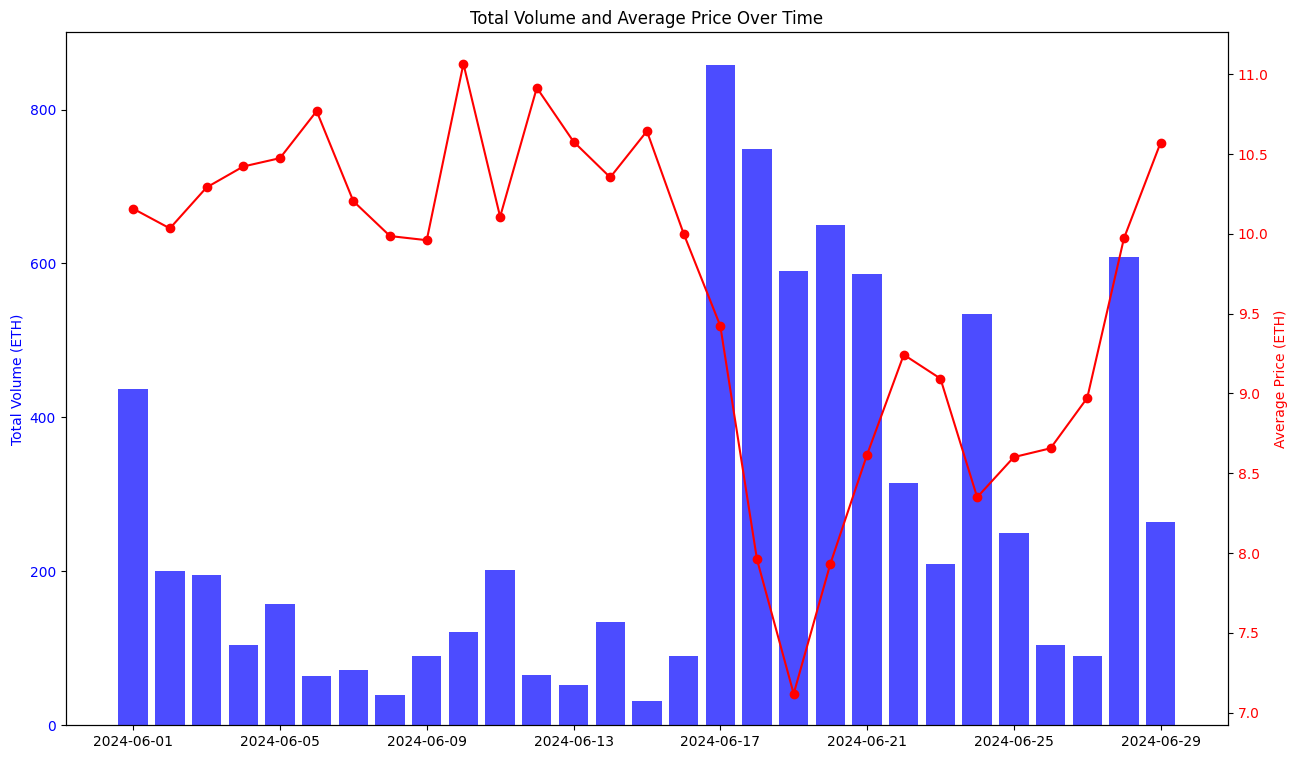

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df_plot = pd.DataFrame(df_combined)


# Tạo figure và axes
fig, ax1 = plt.subplots(figsize=(15,9))

# Vẽ biểu đồ cột trên trục ax1
ax1.bar(df_combined['event_timestamp'],df_combined['total_volume'], color='blue', alpha=0.7)
ax1.set_ylabel('Total Volume (ETH)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Tạo một secondary y-axis
ax2 = ax1.twinx()

# Vẽ biểu đồ đường trên trục ax2
ax2.plot(df_combined['event_timestamp'], df_combined['avg_price'], color='red', marker='o')
ax2.set_ylabel('Average Price (ETH)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Đặt tiêu đề cho biểu đồ và cho các trục
plt.title('Total Volume and Average Price Over Time')
plt.xlabel('Event Timestamp')

# Hiển thị biểu đồ
plt.show()

<Axes: title={'center': 'Giá theo thời gian'}, xlabel='Date', ylabel='price'>

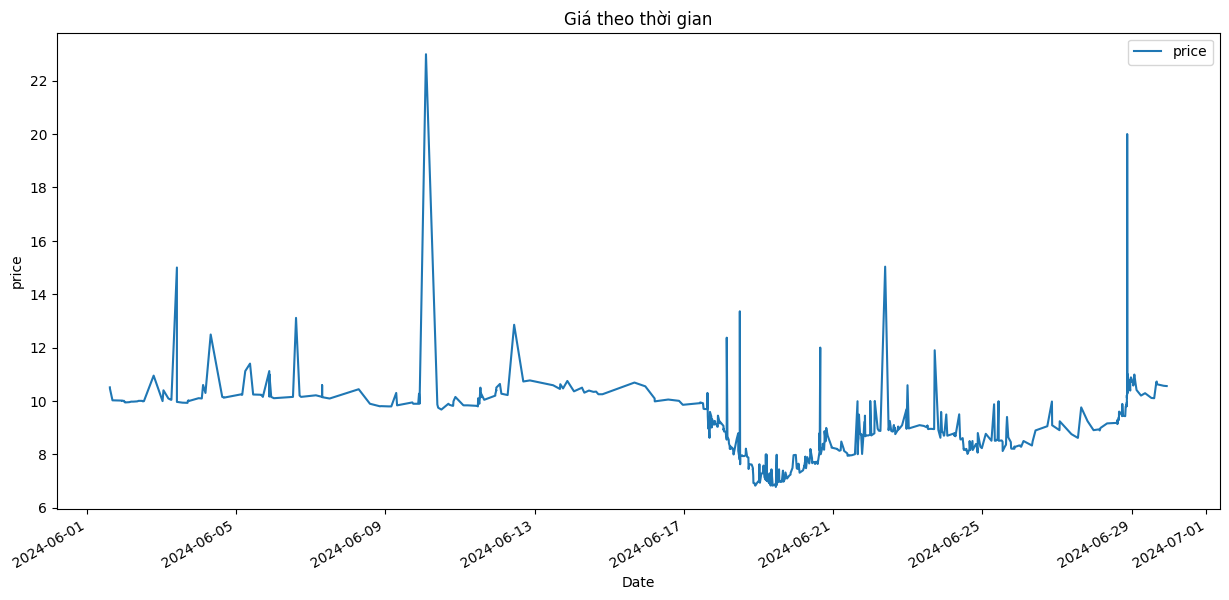

In [17]:

# vẽ biểu đồ price theo timestamp
df_collection_data.plot(y='price', x='event_timestamp', title='Giá theo thời gian', ylabel='price', xlabel='Date', figsize=(15,7))

In [18]:
# token được giao dịch nhiều nhất
df_collection_data.groupby('tokenId')['tokenId'].count().sort_values(ascending=False).head(10)

# df_collection_data.groupby('tokenId')['price'].sum().sort_values()

tokenId
3514    15
5443    14
4167    12
817     11
5314     8
6239     7
3034     7
8063     7
5410     7
4216     7
Name: tokenId, dtype: int64